In [198]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams

from bokeh.io import output_notebook, show
from bokeh.plotting import figure
from bokeh.resources import INLINE
from bokeh.models import ColumnDataSource, Div
from bokeh.models.formatters import DatetimeTickFormatter, NumeralTickFormatter
from bokeh.models import Range1d, Span, Label, HoverTool
from bokeh.models.tickers import SingleIntervalTicker, MonthsTicker
from bokeh.models.glyphs import Scatter
from bokeh.models.widgets import DataTable, TableColumn, NumberFormatter

rcParams['figure.figsize'] = 12, 7
output_notebook(resources=INLINE)

Loading BokehJS ...

In [2]:
overview = pd.read_excel('data.xlsx')
overview.head()

,ID,Name,Industry,Description,Year Founded,Employees,State,City,Metro Area,Unnamed: 9,...,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22
0,1,Over-Hex,Software,Provides a Web-based CRM tool that allows hosp...,2006,25,TN,Franklin,Nashville,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,Unimattax,IT Services,Helps law firms use Thomson Reuters Elite prac...,2009,36,PA,Newtown Square,Philadelphia,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,Lexila,Real Estate,"Offers investment, construction, residential, ...",2013,38,IL,Tinley Park,Chicago,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,Greenfax,Retail,A Verizon Wireless premium retailer that offer...,2012,320,SC,Greenville,"Newberry, SC",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,Saoace,Energy,An energy efficiency consulting firm that work...,2009,24,WI,New Holstein,"Appleton, WI",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
overview.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 23 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ID            1000 non-null   int64  
 1   Name          1000 non-null   object 
 2   Industry      1000 non-null   object 
 3   Description   999 non-null    object 
 4   Year Founded  1000 non-null   int64  
 5   Employees     1000 non-null   int64  
 6   State         1000 non-null   object 
 7   City          1000 non-null   object 
 8   Metro Area    989 non-null    object 
 9   Unnamed: 9    0 non-null      float64
 10  Unnamed: 10   0 non-null      float64
 11  Unnamed: 11   0 non-null      float64
 12  Unnamed: 12   0 non-null      float64
 13  Unnamed: 13   0 non-null      float64
 14  Unnamed: 14   0 non-null      float64
 15  Unnamed: 15   0 non-null      float64
 16  Unnamed: 16   0 non-null      float64
 17  Unnamed: 17   0 non-null      float64
 18  Unnamed: 18   0 non-null     

In [4]:
overview.columns

Index(['ID', 'Name', 'Industry', 'Description', 'Year Founded', 'Employees',
       'State', 'City', 'Metro Area', 'Unnamed: 9', 'Unnamed: 10',
       'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13', 'Unnamed: 14',
       'Unnamed: 15', 'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18',
       'Unnamed: 19', 'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22'],
      dtype='object')

In [5]:
overview.drop(columns=[
    'Unnamed: 9', 'Unnamed: 10',
    'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13', 'Unnamed: 14',
   'Unnamed: 15', 'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18',
   'Unnamed: 19', 'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22'
], inplace=True)

In [6]:
overview.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   ID            1000 non-null   int64 
 1   Name          1000 non-null   object
 2   Industry      1000 non-null   object
 3   Description   999 non-null    object
 4   Year Founded  1000 non-null   int64 
 5   Employees     1000 non-null   int64 
 6   State         1000 non-null   object
 7   City          1000 non-null   object
 8   Metro Area    989 non-null    object
dtypes: int64(3), object(6)
memory usage: 70.4+ KB


In [7]:
overview.isna().sum()

ID               0
Name             0
Industry         0
Description      1
Year Founded     0
Employees        0
State            0
City             0
Metro Area      11
dtype: int64

In [8]:
financials = pd.read_excel('data.xlsx', sheet_name=1)
financials.head()

,ID,Name,2015 Revenue,2015 Expenses,2015 Profit,2015 Growth %,2014 Revenue,2014 Expenses,2014 Profit,2014 Growth %,2013 Revenue,2013 Expenses,2013 Profit,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16
0,1,Over-Hex,10684526.90,1130700.06,9553826.84,3.34,2463739,194747.86,2268991.14,4.10,483086.08,43394.44,439691.64,NaN,NaN,NaN,NaN
1,2,Unimattax,9016542.89,804035.40,8212507.49,0.65,5448571,239226.90,5209344.10,0.41,3864234.75,91714.44,3772520.31,NaN,NaN,NaN,NaN
2,3,Lexila,12456641.64,2149297.00,10307344.65,5.20,2007778,335126.93,1672651.07,4.23,383896.37,112257.41,271638.96,NaN,NaN,NaN,NaN
3,4,Greenfax,7746272.07,1044375.49,6701896.58,3.17,1857830,247048.76,1610781.24,0.56,1190916.67,625442.66,565474.01,NaN,NaN,NaN,NaN
4,5,Saoace,10725585.46,2694644.42,8030941.04,3.12,2604017,615040.85,1988976.15,2.39,768146.61,222962.86,545183.75,NaN,NaN,NaN,NaN


In [9]:
financials.columns

Index(['ID', 'Name', '2015 Revenue', '2015 Expenses', '2015 Profit',
       '2015 Growth %', '2014 Revenue', '2014 Expenses', '2014 Profit',
       '2014 Growth %', '2013 Revenue', '2013 Expenses', '2013 Profit',
       'Unnamed: 13', 'Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16'],
      dtype='object')

In [10]:
financials.drop(columns=['Unnamed: 13', 'Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16'], inplace=True)
financials.head()

,ID,Name,2015 Revenue,2015 Expenses,2015 Profit,2015 Growth %,2014 Revenue,2014 Expenses,2014 Profit,2014 Growth %,2013 Revenue,2013 Expenses,2013 Profit
0,1,Over-Hex,10684526.90,1130700.06,9553826.84,3.34,2463739,194747.86,2268991.14,4.10,483086.08,43394.44,439691.64
1,2,Unimattax,9016542.89,804035.40,8212507.49,0.65,5448571,239226.90,5209344.10,0.41,3864234.75,91714.44,3772520.31
2,3,Lexila,12456641.64,2149297.00,10307344.65,5.20,2007778,335126.93,1672651.07,4.23,383896.37,112257.41,271638.96
3,4,Greenfax,7746272.07,1044375.49,6701896.58,3.17,1857830,247048.76,1610781.24,0.56,1190916.67,625442.66,565474.01
4,5,Saoace,10725585.46,2694644.42,8030941.04,3.12,2604017,615040.85,1988976.15,2.39,768146.61,222962.86,545183.75


In [11]:
financials.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             1000 non-null   int64  
 1   Name           1000 non-null   object 
 2   2015 Revenue   1000 non-null   float64
 3   2015 Expenses  1000 non-null   float64
 4   2015 Profit    1000 non-null   float64
 5   2015 Growth %  1000 non-null   float64
 6   2014 Revenue   1000 non-null   int64  
 7   2014 Expenses  1000 non-null   float64
 8   2014 Profit    1000 non-null   float64
 9   2014 Growth %  920 non-null    float64
 10  2013 Revenue   920 non-null    float64
 11  2013 Expenses  920 non-null    float64
 12  2013 Profit    920 non-null    float64
dtypes: float64(10), int64(2), object(1)
memory usage: 101.7+ KB


In [12]:
financials.isna().sum()

ID                0
Name              0
2015 Revenue      0
2015 Expenses     0
2015 Profit       0
2015 Growth %     0
2014 Revenue      0
2014 Expenses     0
2014 Profit       0
2014 Growth %    80
2013 Revenue     80
2013 Expenses    80
2013 Profit      80
dtype: int64

In [13]:
df = pd.merge(overview, financials, on=['ID', 'Name'], validate='1:1')

In [14]:
df.head()

,ID,Name,Industry,Description,Year Founded,Employees,State,City,Metro Area,2015 Revenue,2015 Expenses,2015 Profit,2015 Growth %,2014 Revenue,2014 Expenses,2014 Profit,2014 Growth %,2013 Revenue,2013 Expenses,2013 Profit
0,1,Over-Hex,Software,Provides a Web-based CRM tool that allows hosp...,2006,25,TN,Franklin,Nashville,10684526.90,1130700.06,9553826.84,3.34,2463739,194747.86,2268991.14,4.10,483086.08,43394.44,439691.64
1,2,Unimattax,IT Services,Helps law firms use Thomson Reuters Elite prac...,2009,36,PA,Newtown Square,Philadelphia,9016542.89,804035.40,8212507.49,0.65,5448571,239226.90,5209344.10,0.41,3864234.75,91714.44,3772520.31
2,3,Lexila,Real Estate,"Offers investment, construction, residential, ...",2013,38,IL,Tinley Park,Chicago,12456641.64,2149297.00,10307344.65,5.20,2007778,335126.93,1672651.07,4.23,383896.37,112257.41,271638.96
3,4,Greenfax,Retail,A Verizon Wireless premium retailer that offer...,2012,320,SC,Greenville,"Newberry, SC",7746272.07,1044375.49,6701896.58,3.17,1857830,247048.76,1610781.24,0.56,1190916.67,625442.66,565474.01
4,5,Saoace,Energy,An energy efficiency consulting firm that work...,2009,24,WI,New Holstein,"Appleton, WI",10725585.46,2694644.42,8030941.04,3.12,2604017,615040.85,1988976.15,2.39,768146.61,222962.86,545183.75


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             1000 non-null   int64  
 1   Name           1000 non-null   object 
 2   Industry       1000 non-null   object 
 3   Description    999 non-null    object 
 4   Year Founded   1000 non-null   int64  
 5   Employees      1000 non-null   int64  
 6   State          1000 non-null   object 
 7   City           1000 non-null   object 
 8   Metro Area     989 non-null    object 
 9   2015 Revenue   1000 non-null   float64
 10  2015 Expenses  1000 non-null   float64
 11  2015 Profit    1000 non-null   float64
 12  2015 Growth %  1000 non-null   float64
 13  2014 Revenue   1000 non-null   int64  
 14  2014 Expenses  1000 non-null   float64
 15  2014 Profit    1000 non-null   float64
 16  2014 Growth %  920 non-null    float64
 17  2013 Revenue   920 non-null    float64
 18  2013 Expe

In [16]:
df.isna().sum()

ID                0
Name              0
Industry          0
Description       1
Year Founded      0
Employees         0
State             0
City              0
Metro Area       11
2015 Revenue      0
2015 Expenses     0
2015 Profit       0
2015 Growth %     0
2014 Revenue      0
2014 Expenses     0
2014 Profit       0
2014 Growth %    80
2013 Revenue     80
2013 Expenses    80
2013 Profit      80
dtype: int64

In [17]:
df.dropna(inplace=True)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 908 entries, 0 to 999
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             908 non-null    int64  
 1   Name           908 non-null    object 
 2   Industry       908 non-null    object 
 3   Description    908 non-null    object 
 4   Year Founded   908 non-null    int64  
 5   Employees      908 non-null    int64  
 6   State          908 non-null    object 
 7   City           908 non-null    object 
 8   Metro Area     908 non-null    object 
 9   2015 Revenue   908 non-null    float64
 10  2015 Expenses  908 non-null    float64
 11  2015 Profit    908 non-null    float64
 12  2015 Growth %  908 non-null    float64
 13  2014 Revenue   908 non-null    int64  
 14  2014 Expenses  908 non-null    float64
 15  2014 Profit    908 non-null    float64
 16  2014 Growth %  908 non-null    float64
 17  2013 Revenue   908 non-null    float64
 18  2013 Expen

In [19]:
df.isna().sum()

ID               0
Name             0
Industry         0
Description      0
Year Founded     0
Employees        0
State            0
City             0
Metro Area       0
2015 Revenue     0
2015 Expenses    0
2015 Profit      0
2015 Growth %    0
2014 Revenue     0
2014 Expenses    0
2014 Profit      0
2014 Growth %    0
2013 Revenue     0
2013 Expenses    0
2013 Profit      0
dtype: int64

In [20]:
df.columns = map(lambda x: x.lower().replace(' ', '_'), df.columns)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 908 entries, 0 to 999
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             908 non-null    int64  
 1   name           908 non-null    object 
 2   industry       908 non-null    object 
 3   description    908 non-null    object 
 4   year_founded   908 non-null    int64  
 5   employees      908 non-null    int64  
 6   state          908 non-null    object 
 7   city           908 non-null    object 
 8   metro_area     908 non-null    object 
 9   2015_revenue   908 non-null    float64
 10  2015_expenses  908 non-null    float64
 11  2015_profit    908 non-null    float64
 12  2015_growth_%  908 non-null    float64
 13  2014_revenue   908 non-null    int64  
 14  2014_expenses  908 non-null    float64
 15  2014_profit    908 non-null    float64
 16  2014_growth_%  908 non-null    float64
 17  2013_revenue   908 non-null    float64
 18  2013_expen

In [22]:
num_dim = df[['employees', '2015_revenue', '2015_expenses',
       '2015_profit', '2015_growth_%', '2014_revenue', '2014_expenses',
       '2014_profit', '2014_growth_%', '2013_revenue', '2013_expenses',
       '2013_profit']]

In [23]:
num_dim.head()

,employees,2015_revenue,2015_expenses,2015_profit,2015_growth_%,2014_revenue,2014_expenses,2014_profit,2014_growth_%,2013_revenue,2013_expenses,2013_profit
0,25,10684526.90,1130700.06,9553826.84,3.34,2463739,194747.86,2268991.14,4.10,483086.08,43394.44,439691.64
1,36,9016542.89,804035.40,8212507.49,0.65,5448571,239226.90,5209344.10,0.41,3864234.75,91714.44,3772520.31
2,38,12456641.64,2149297.00,10307344.65,5.20,2007778,335126.93,1672651.07,4.23,383896.37,112257.41,271638.96
3,320,7746272.07,1044375.49,6701896.58,3.17,1857830,247048.76,1610781.24,0.56,1190916.67,625442.66,565474.01
4,24,10725585.46,2694644.42,8030941.04,3.12,2604017,615040.85,1988976.15,2.39,768146.61,222962.86,545183.75


In [24]:
num_dim.describe()

,employees,2015_revenue,2015_expenses,2015_profit,2015_growth_%,2014_revenue,2014_expenses,2014_profit,2014_growth_%,2013_revenue,2013_expenses,2013_profit
count,908.000000,9.080000e+02,9.080000e+02,9.080000e+02,908.000000,9.080000e+02,9.080000e+02,9.080000e+02,908.000000,9.080000e+02,9.080000e+02,9.080000e+02
mean,136.547357,9.055917e+06,4.136151e+06,4.919766e+06,4.006267,1.892282e+06,9.394246e+05,9.786082e+05,3.474835,5.267747e+05,4.209540e+05,1.058207e+05
std,352.229486,2.046660e+06,1.943528e+06,2.864968e+06,1.020797,6.172728e+05,8.249004e+05,9.614300e+05,1.425138,4.678418e+05,1.375671e+06,1.260657e+06
min,0.000000,2.631235e+06,1.256350e+05,-3.560690e+06,0.650000,5.267600e+05,2.321939e+04,-6.934493e+06,-0.450000,9.920151e+04,4.071040e+03,-2.438096e+07
25%,24.000000,7.712933e+06,2.743694e+06,2.932454e+06,3.327500,1.462204e+06,5.196481e+05,5.469004e+05,2.470000,2.836725e+05,1.075257e+05,7.928868e+04
50%,46.500000,9.041083e+06,4.184455e+06,4.979900e+06,4.060000,1.816482e+06,7.991529e+05,9.743072e+05,3.550000,4.050208e+05,1.868304e+05,1.826333e+05
75%,120.000000,1.037748e+07,5.507684e+06,6.864754e+06,4.700000,2.216252e+06,1.151267e+06,1.430882e+06,4.452500,6.055422e+05,3.257658e+05,3.194057e+05
max,7125.000000,1.681005e+07,1.086910e+07,1.462453e+07,7.840000,5.448571e+06,1.169091e+07,1.503437e+07,7.780000,4.557546e+06,2.691650e+07,3.772520e+06


<AxesSubplot:>

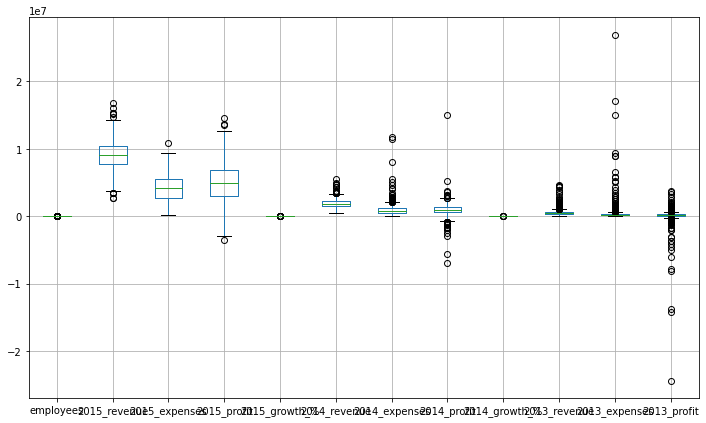

In [25]:
num_dim.boxplot()

In [26]:
df.columns

Index(['id', 'name', 'industry', 'description', 'year_founded', 'employees',
       'state', 'city', 'metro_area', '2015_revenue', '2015_expenses',
       '2015_profit', '2015_growth_%', '2014_revenue', '2014_expenses',
       '2014_profit', '2014_growth_%', '2013_revenue', '2013_expenses',
       '2013_profit'],
      dtype='object')

In [27]:
order = df.industry.value_counts().index.to_list()

In [28]:
order

['IT Services',
 'Software',
 'Health',
 'Business Products & Services',
 'Advertising & Marketing',
 'Financial Services',
 'Construction',
 'Government Services',
 'Retail',
 'Consumer Products & Services',
 'Human Resources',
 'Food & Beverage',
 'Logistics & Transportation',
 'Telecommunications',
 'Manufacturing',
 'Real Estate',
 'Energy',
 'Engineering',
 'Education',
 'Media',
 'Insurance',
 'Security',
 'Environmental Services',
 'Computer Hardware',
 'Travel & Hospitality']

<AxesSubplot:xlabel='count', ylabel='industry'>

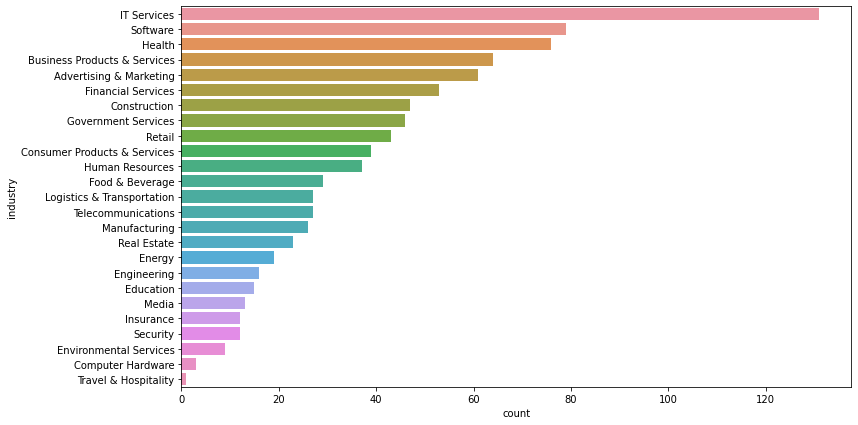

In [29]:
sns.countplot(data=df, y='industry', order=order)

<AxesSubplot:xlabel='industry'>

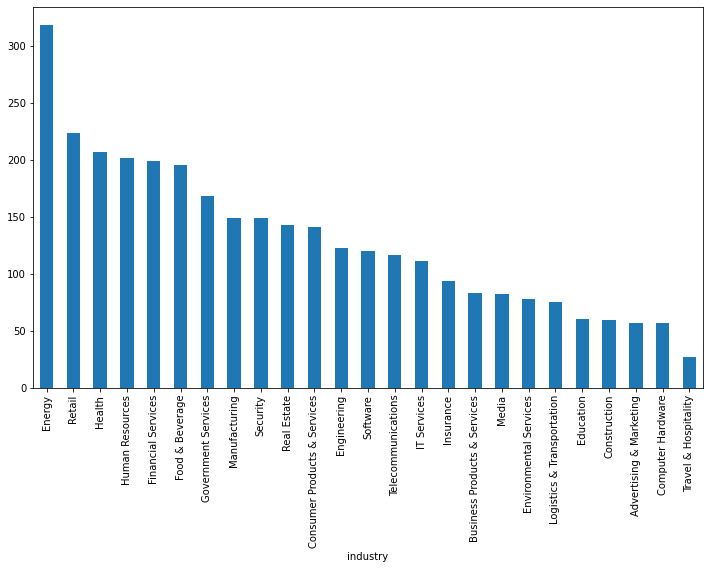

In [30]:
df.groupby('industry').mean()['employees'].sort_values(ascending=False).plot.bar()

In [31]:
df[['name', '2015_growth_%']].sort_values(by='2015_growth_%', ascending=False)

,name,2015_growth_%
181,Rankfind,7.84
350,Matelectronics,7.76
531,Wimpleddrift,7.69
43,Salttrans,7.08
850,Voleworry,6.91
...,...,...
789,Rawchickenequip,1.39
318,Keytouch,1.29
557,Dingalingflee,1.27
968,Serpentineappeals,1.25


In [32]:
df[['name', '2014_growth_%']].sort_values(by='2014_growth_%', ascending=False)

,name,2014_growth_%
149,Volhouse,7.78
662,Armet,7.75
663,Messrs,7.67
531,Wimpleddrift,7.50
373,Kanlux,7.23
...,...,...
951,Chinekogi,0.02
280,Unoline,-0.18
984,Portfolioeducated,-0.21
200,Blacktaxon,-0.35


In [33]:
def revenue_cutoff(x):
    map_ = {True: 'above', False: 'below'}
    return map_[x]

revenue_cutoff = np.vectorize(revenue_cutoff)

- Revenue threshold > 9,000,000
- Expense threshold < 5,000,000

In [34]:
rev_thresh = 9000000
exp_thresh = 5000000

In [35]:
df.columns

Index(['id', 'name', 'industry', 'description', 'year_founded', 'employees',
       'state', 'city', 'metro_area', '2015_revenue', '2015_expenses',
       '2015_profit', '2015_growth_%', '2014_revenue', '2014_expenses',
       '2014_profit', '2014_growth_%', '2013_revenue', '2013_expenses',
       '2013_profit'],
      dtype='object')

In [36]:
df = df[['id', 'name', 'industry', 'description', 'year_founded', 'employees',
       'state', 'city', 'metro_area', '2015_revenue', '2015_expenses',
       '2015_profit', '2015_growth_%']]

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 908 entries, 0 to 999
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             908 non-null    int64  
 1   name           908 non-null    object 
 2   industry       908 non-null    object 
 3   description    908 non-null    object 
 4   year_founded   908 non-null    int64  
 5   employees      908 non-null    int64  
 6   state          908 non-null    object 
 7   city           908 non-null    object 
 8   metro_area     908 non-null    object 
 9   2015_revenue   908 non-null    float64
 10  2015_expenses  908 non-null    float64
 11  2015_profit    908 non-null    float64
 12  2015_growth_%  908 non-null    float64
dtypes: float64(4), int64(3), object(6)
memory usage: 131.6+ KB


In [38]:
df.head()

,id,name,industry,description,year_founded,employees,state,city,metro_area,2015_revenue,2015_expenses,2015_profit,2015_growth_%
0,1,Over-Hex,Software,Provides a Web-based CRM tool that allows hosp...,2006,25,TN,Franklin,Nashville,10684526.90,1130700.06,9553826.84,3.34
1,2,Unimattax,IT Services,Helps law firms use Thomson Reuters Elite prac...,2009,36,PA,Newtown Square,Philadelphia,9016542.89,804035.40,8212507.49,0.65
2,3,Lexila,Real Estate,"Offers investment, construction, residential, ...",2013,38,IL,Tinley Park,Chicago,12456641.64,2149297.00,10307344.65,5.20
3,4,Greenfax,Retail,A Verizon Wireless premium retailer that offer...,2012,320,SC,Greenville,"Newberry, SC",7746272.07,1044375.49,6701896.58,3.17
4,5,Saoace,Energy,An energy efficiency consulting firm that work...,2009,24,WI,New Holstein,"Appleton, WI",10725585.46,2694644.42,8030941.04,3.12


In [39]:
df['revenue_cutoff'] = df['2015_revenue'].apply(lambda x: 'high' if x > rev_thresh else 'low')

In [40]:
df.head()

,id,name,industry,description,year_founded,employees,state,city,metro_area,2015_revenue,2015_expenses,2015_profit,2015_growth_%,revenue_cutoff
0,1,Over-Hex,Software,Provides a Web-based CRM tool that allows hosp...,2006,25,TN,Franklin,Nashville,10684526.90,1130700.06,9553826.84,3.34,high
1,2,Unimattax,IT Services,Helps law firms use Thomson Reuters Elite prac...,2009,36,PA,Newtown Square,Philadelphia,9016542.89,804035.40,8212507.49,0.65,high
2,3,Lexila,Real Estate,"Offers investment, construction, residential, ...",2013,38,IL,Tinley Park,Chicago,12456641.64,2149297.00,10307344.65,5.20,high
3,4,Greenfax,Retail,A Verizon Wireless premium retailer that offer...,2012,320,SC,Greenville,"Newberry, SC",7746272.07,1044375.49,6701896.58,3.17,low
4,5,Saoace,Energy,An energy efficiency consulting firm that work...,2009,24,WI,New Holstein,"Appleton, WI",10725585.46,2694644.42,8030941.04,3.12,high


[Text(0, 0.5, '2015 Expenses'),
 Text(0.5, 0, '2015 Revenue'),
 Text(0.5, 1.0, 'High Revenue')]

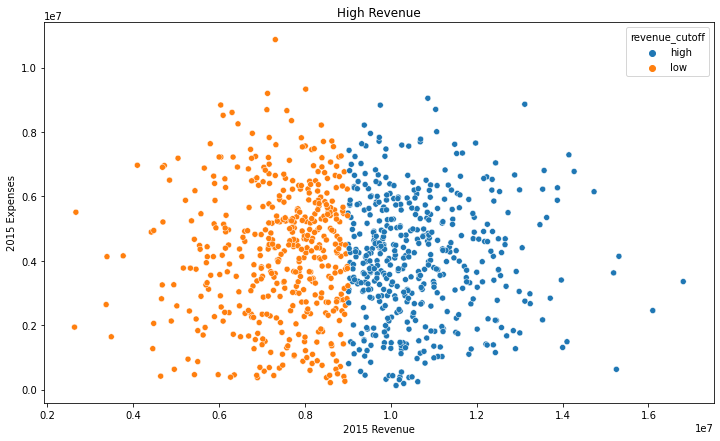

In [41]:
ax = sns.scatterplot(data=df, x='2015_revenue', y='2015_expenses', hue='revenue_cutoff')
ax.set(ylabel='2015 Expenses', xlabel='2015 Revenue', title='High Revenue')

In [42]:
df['expense_cutoff'] = df['2015_expenses'].apply(lambda x: 'high' if x > exp_thresh else 'low')

In [43]:
df.head()

,id,name,industry,description,year_founded,employees,state,city,metro_area,2015_revenue,2015_expenses,2015_profit,2015_growth_%,revenue_cutoff,expense_cutoff
0,1,Over-Hex,Software,Provides a Web-based CRM tool that allows hosp...,2006,25,TN,Franklin,Nashville,10684526.90,1130700.06,9553826.84,3.34,high,low
1,2,Unimattax,IT Services,Helps law firms use Thomson Reuters Elite prac...,2009,36,PA,Newtown Square,Philadelphia,9016542.89,804035.40,8212507.49,0.65,high,low
2,3,Lexila,Real Estate,"Offers investment, construction, residential, ...",2013,38,IL,Tinley Park,Chicago,12456641.64,2149297.00,10307344.65,5.20,high,low
3,4,Greenfax,Retail,A Verizon Wireless premium retailer that offer...,2012,320,SC,Greenville,"Newberry, SC",7746272.07,1044375.49,6701896.58,3.17,low,low
4,5,Saoace,Energy,An energy efficiency consulting firm that work...,2009,24,WI,New Holstein,"Appleton, WI",10725585.46,2694644.42,8030941.04,3.12,high,low


[Text(0, 0.5, '2015 Expenses'),
 Text(0.5, 0, '2015 Revenue'),
 Text(0.5, 1.0, 'Low Expenses')]

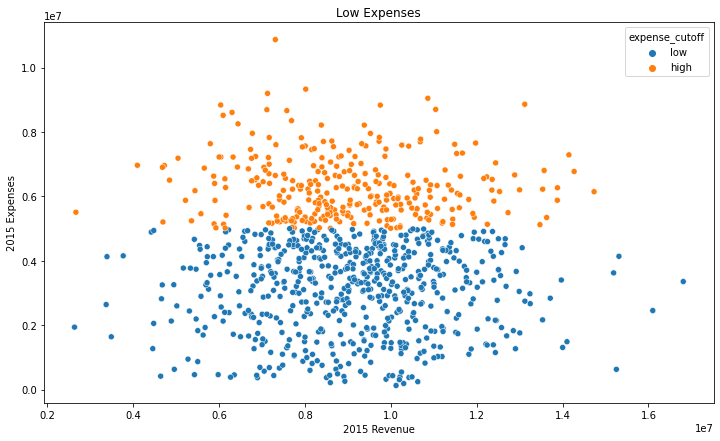

In [44]:
ax = sns.scatterplot(data=df, x='2015_revenue', y='2015_expenses', hue='expense_cutoff')
ax.set(ylabel='2015 Expenses', xlabel='2015 Revenue', title='Low Expenses')

In [45]:
df['target_quadrant'] = (df['revenue_cutoff'] == 'high') & (df['expense_cutoff'] == 'low')

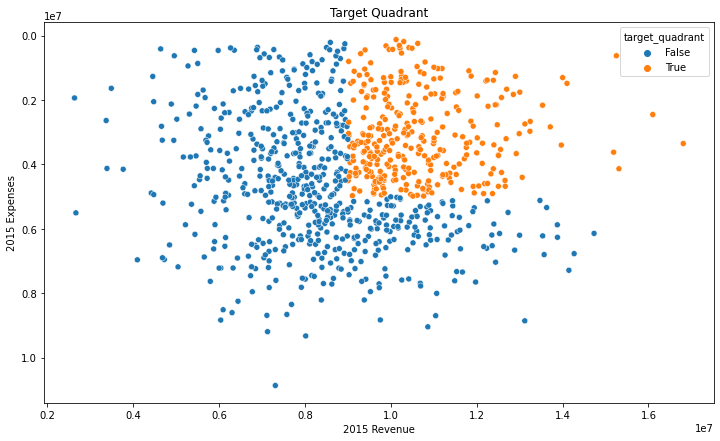

In [46]:
ax = sns.scatterplot(data=df, x='2015_revenue', y='2015_expenses', hue='target_quadrant')
ax.set(ylabel='2015 Expenses', xlabel='2015 Revenue', title='Target Quadrant')
ax.invert_yaxis()

In [47]:
top_growth = df.nlargest(10, columns='2015_growth_%')
df['top_growth'] = df['id'].isin(top_growth['id'])
df['target'] = (df['target_quadrant'] == True) & (df['top_growth'] == True)

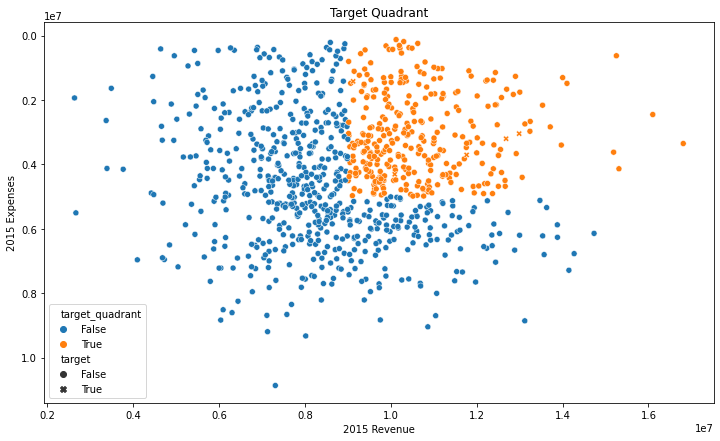

In [48]:
ax = sns.scatterplot(data=df, x='2015_revenue', y='2015_expenses', hue='target_quadrant', style='target')
ax.set(ylabel='2015 Expenses', xlabel='2015 Revenue', title='Target Quadrant')
ax.invert_yaxis()

In [49]:
def set_color(df):
    tq, t = df['target_quadrant'], df['target']
    if t:
        return '#C65E69'
    elif tq:
        return '#4E79A7'
    return '#ACA899'

In [192]:
df.head()

,id,name,industry,description,year_founded,employees,state,city,metro_area,2015_revenue,...,2015_growth,revenue_cutoff,expense_cutoff,target_quadrant,top_growth,target,marker,color,size,growth
0,1,Over-Hex,Software,Provides a Web-based CRM tool that allows hosp...,2006,25,TN,Franklin,Nashville,10684526.90,...,3.34,high,low,True,False,False,circle,#4E79A7,11,334.0
1,2,Unimattax,IT Services,Helps law firms use Thomson Reuters Elite prac...,2009,36,PA,Newtown Square,Philadelphia,9016542.89,...,0.65,high,low,True,False,False,circle,#4E79A7,11,65.0
2,3,Lexila,Real Estate,"Offers investment, construction, residential, ...",2013,38,IL,Tinley Park,Chicago,12456641.64,...,5.20,high,low,True,False,False,circle,#4E79A7,11,520.0
3,4,Greenfax,Retail,A Verizon Wireless premium retailer that offer...,2012,320,SC,Greenville,"Newberry, SC",7746272.07,...,3.17,low,low,False,False,False,circle,#ACA899,11,317.0
4,5,Saoace,Energy,An energy efficiency consulting firm that work...,2009,24,WI,New Holstein,"Appleton, WI",10725585.46,...,3.12,high,low,True,False,False,circle,#4E79A7,11,312.0


In [191]:
df['marker'] = df['target'].apply(lambda x: 'diamond' if x else 'circle')
df['color'] = df[['target_quadrant', 'target']].apply(set_color, axis=1)
df['size'] = df['marker'].apply(lambda x: 11 if x == 'circle' else 15)
df['growth'] = df['2015_growth'] * 100

In [51]:
df[['marker', 'size']].head()

,marker,size
0,circle,11
1,circle,11
2,circle,11
3,circle,11
4,circle,11


In [83]:
def num_formatter(n):
    # pattern = re.compile('[1-9]+[0]+')
    # return pattern.findall(str(n))
    millions = round(n / 1000000, 1)
    return f'${millions}M'

In [108]:
df.rename(columns={'2015_growth_%': '2015_growth'}, inplace=True)

In [222]:
source = ColumnDataSource(df.sort_values(by='2015_growth', ascending=False))

In [227]:
fig = figure(
    plot_width=800, 
    plot_height=600, 
    y_axis_label='Expenses',
    x_axis_label='Revenue',
    x_range=(0, source.data['2015_revenue'].max() + 1000000),
)

hover = HoverTool(tooltips="""
    <div>
        <div>
            <span style="font-size: 14px; font-weight: bold;">@name</span>
        </div>
        <div>
            <span style="font-size: 13px; color: black; font-weight: bold">Industry: </span>
            <span style="font-size: 13px;">@industry</span><br>
            
            <span style="font-size: 13px; color: black; font-weight: bold">Year Founded: </span>
            <span style="font-size: 13px;">@year_founded</span><br>
            
            <span style="font-size: 13px; color: black; font-weight: bold">2015 Revenue: </span>
            <span style="font-size: 13px;">@2015_revenue{$0.0a}</span><br>
            
            <span style="font-size: 13px; color: black; font-weight: bold">2015 Expenses: </span>
            <span style="font-size: 13px;">@2015_expenses{$0.0a}</span><br>
            
            <span style="font-size: 13px; color: black; font-weight: bold">2015 Growth: </span>
            <span style="font-size: 13px;">@2015_growth{0%}</span><br>
            
            <span style="font-size: 13px; color: black; font-weight: bold">Summary: </span>
            <span style="font-size: 13px;">@description</span><br>
        </div>
    </div>
""")
fig.tools = []
fig.add_tools(hover)
fig.toolbar.logo = None
fig.scatter(source=source, x='2015_revenue', y='2015_expenses', size='size', alpha=0.85, marker='marker', color='color')

fig.axis.minor_tick_line_color = None
fig.axis.major_tick_in = 0
fig.axis.major_label_text_color = '#646464'
fig.axis.major_tick_line_color = "#e5e5e5"
fig.axis.major_tick_line_alpha = 0.3
fig.axis.axis_line_color = "#e5e5e5"
fig.axis.axis_label_text_font_size = '14px'
fig.axis.axis_label_text_font_style = 'bold'
# fig.axis.major_label_text_font_style = 'bold'
fig.axis.major_label_text_font_size = '13px'

fig.yaxis.formatter = NumeralTickFormatter(format='0a')
fig.y_range.flipped = True
fig.ygrid.grid_line_width = 1
fig.ygrid.grid_line_alpha = 0.3

fig.xaxis.formatter = NumeralTickFormatter(format='0a')
fig.xaxis.ticker = SingleIntervalTicker(interval=2000000)
fig.xgrid.grid_line_width = 1
fig.xgrid.grid_line_alpha = 0.3

revenue_reference_line = Span(location=rev_thresh, dimension='height', line_color='black', line_width=2, line_alpha=0.4)
expense_reference_line = Span(location=exp_thresh, dimension='width', line_color='black', line_width=2, line_alpha=0.4)
label = Label(x=0, y=exp_thresh, y_offset=5, text=num_formatter(exp_thresh))
fig.add_layout(revenue_reference_line)
fig.add_layout(expense_reference_line)
fig.add_layout(label)
show(fig)

In [224]:
# table_source = ColumnDataSource(df[['name', '2015_growth']].sort_values(by='2015_growth', ascending=False))

In [248]:
columns = [
        TableColumn(field="name", title="Company", width=150),
        TableColumn(field="2015_growth", title="2015 Growth", formatter=NumberFormatter(format='0%', text_align='right'), width=60),
    ]
data_table = DataTable(source=source, columns=columns, sortable=False, index_position=None, fit_columns=True, width=210)
show(data_table)